<a id='top'><img src='src/top.webp' style='float:center; width:1000px;'></a>

# <center>[Intro to AI] HW4</center>
## <div class="pull-right">2017025769 신선웅</div>

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Assignment</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#0" role="tab" aria-controls="profile">Setting<span class="badge badge-primary badge-pill">0</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile">Data Preprocessing<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages">Perceptron Learning<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings">Train and test the model<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings">Visualize misclassified test images<span class="badge badge-primary badge-pill">4</span></a> 

# <a id='0'>0. Setting</a>

### 📚Libraries for Mathematics (Linear algebra)

In [2]:
import numpy as np

### 📚Libraries for Loading MNIST Datasets

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_target, test_target = train_test_split(mnist.data, mnist.target, 
                                                                          test_size=10000, random_state=42)
train_dataset.shape, train_target.shape

((60000, 784), (60000,))

### 📚Libraries for Visualization

In [4]:
import matplotlib.pyplot as plt

# <a id='1'>1. Data preprocessing</a>

> **We'll create new datasets composed of digits 0 and 1 only.**

### 1.1 Create $X_{train, 01}$(training data of 0 and 1 only), $y_{train, 01}$(class labels of $X_{train, 01}$),<br>&nbsp;&nbsp;&nbsp;&nbsp; $X_{test, 01}$(test data of 0 and 1 only), $y_{test, 01}$(class labels of $X_{test, 01}$).

In [5]:
X_train01 = train_dataset[(train_target=='0') | (train_target=='1')] # delete label except 0, 1

In [6]:
y_train01 = train_target[(train_target=='0') | (train_target=='1')] # delete label except 0, 1
y_train01 = np.where(y_train01=='0', '-1', y_train01) # change label name from 0 to -1
y_train01 = y_train01.astype('int8') # convert label type from str to int

In [7]:
X_test01 = test_dataset[(test_target=='0') | (test_target=='1')] # delete label except 0, 1

In [8]:
y_test01 = test_target[(test_target=='0') | (test_target=='1')] # delete label except 0, 1
y_test01 = np.where(y_test01=='0', '-1', y_test01) ## change label name from 0 to -1
y_test01 = y_test01.astype('int8') # convert label type from str to int

### 1.2 Append ones as a feature to the vetorized images

In [9]:
X_train01 = np.hstack((np.ones((X_train01.shape[0] , 1)), X_train01)) # add one feature
X_test01 = np.hstack((np.ones((X_test01.shape[0] , 1)), X_test01)) # add one feature

In [10]:
print('X_train01.shape:', X_train01.shape) 
print('y_train01.shape:', y_train01.shape)
print('X_test01.shape:', X_test01.shape)
print('y_test01.shape:', y_test01.shape)

X_train01.shape: (12645, 785)
y_train01.shape: (12645,)
X_test01.shape: (2135, 785)
y_test01.shape: (2135,)


# <a id='2'>2. Perceptron learning</a>

>**Perceptron learning Implement the perceptron learning algorithm summarized in slide 08.<br>If you want to code up the learning rule as a function, see below for your information:**

In [11]:
# define training function
def train_perceptron(X, y, w, learning_rate):
    nb_changes = 0
    for i in range(X.shape[0]):
        if X[i].dot(w) * y[i] <= 0:
            w = w + learning_rate * y[i] * X[i] # update w
            nb_changes += 1
    return w, nb_changes

In [12]:
# define error function
def error(X, y, w):
    nb_changes = 0
    for i in range(X.shape[0]):
        if X[i].dot(w) * y[i] <= 0:
            nb_changes += 1
    return nb_changes / len(X) * 100

# <a id='3'>3. Train and test the model</a>

In [13]:
learning_rate = 1e-3 # learning rate initialization
nb_epochs_max = 100 # epoch initialization
w = np.random.randn(X_train01.shape[1]) # weight initialization
for j in range(nb_epochs_max):
    w, nb_changes = train_perceptron(X_train01, y_train01, w, 1e-3) # training
    train_error = error(X_train01, y_train01, w) # get train error
    test_error = error(X_test01, y_test01, w) # get test error
    print('epoch {} nb_changes {} train_error {:.2f}% test_error {:.2f}%'
          .format(j, nb_changes, train_error, test_error))
    if nb_changes == 0: # finish training when there's no need to train
        break

epoch 0 nb_changes 47 train_error 0.32% test_error 0.19%
epoch 1 nb_changes 29 train_error 0.14% test_error 0.09%
epoch 2 nb_changes 27 train_error 0.08% test_error 0.14%
epoch 3 nb_changes 18 train_error 0.15% test_error 0.19%
epoch 4 nb_changes 21 train_error 0.25% test_error 0.23%
epoch 5 nb_changes 8 train_error 0.02% test_error 0.14%
epoch 6 nb_changes 8 train_error 0.02% test_error 0.19%
epoch 7 nb_changes 4 train_error 0.02% test_error 0.19%
epoch 8 nb_changes 3 train_error 0.04% test_error 0.28%
epoch 9 nb_changes 3 train_error 0.01% test_error 0.28%
epoch 10 nb_changes 7 train_error 0.03% test_error 0.23%
epoch 11 nb_changes 4 train_error 0.00% test_error 0.19%
epoch 12 nb_changes 0 train_error 0.00% test_error 0.19%


# <a id='4'>4. Visualize misclassified test images</a>

### 4.1 Make list of misclassified test images

In [14]:
nb_changes = 0
X_test01_wrong = []
y_test01_wrong = []
for i in range(X_test01.shape[0]):
    if X_test01[i].dot(w) * y_test01[i] <= 0:
        X_test01_wrong.append(X_test01[i])
        y_test01_wrong.append(y_test01[i])
        nb_changes += 1
print('The number of misclassified test image:', nb_changes)

The number of misclassified test image: 4


### 4.2 Convert to original array type

In [15]:
X_test01_wrong = np.delete(np.array(X_test01_wrong), 0, axis=1) # Delete one feature
y_test01_wrong = np.where(np.array(y_test01_wrong)==-1, 0, y_test01_wrong) # Convert class label from -1 to 0

### 4.3 Visualize image

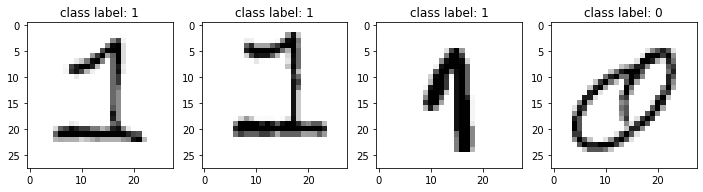

In [16]:
# 가중치 초기화 단계에서 random seed를 고정하지 않아 misclassified된 이미지 개수가 달라질 수 있으므로
# 달라진 개수만큼 시각화하도록 코드를 작성하였습니다

fig = plt.figure(figsize=(nb_changes*3, nb_changes*2))

for i in range(nb_changes):
    plt.subplot(1, nb_changes, i+1)
    plt.imshow(X_test01_wrong[i].reshape(-1, 28), cmap='gray_r')
    plt.title('class label: %d'%(y_test01_wrong[i]))

<center><a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Move to TOP</a><center>